<a href="https://colab.research.google.com/github/shameer-phy/ML/blob/main/CaseStudy_Cement/BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the necessary packages and read the dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
BostonH = pd.read_csv('https://raw.githubusercontent.com/shameer-phy/ML/main/CaseStudy_BostonData/Boston.csv')

In [ ]:
BostonH.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#1st column is not required as it is just serial number. Let's remove it.

In [ ]:
BostonH = BostonH.iloc[:,1:]

In [ ]:
BostonH.head()
BostonH.shape

(506, 14)

In [ ]:
BostonH.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [ ]:
BostonH.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#All the columns seem to be continuous. But lets check 'zn','chas' and 'rad' columns if the are continuous.

In [ ]:
BostonH['zn'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [ ]:
BostonH['chas'].unique()

array([0, 1])

In [ ]:
BostonH['rad'].unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24])

#Lets check for outliers in data with box plot

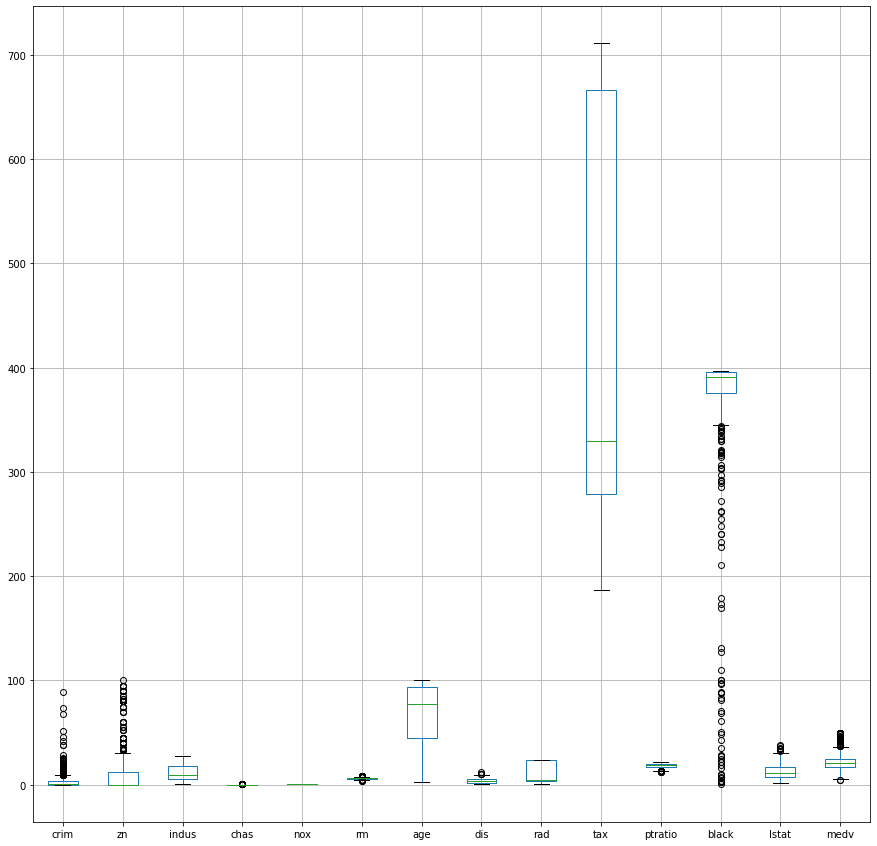

In [ ]:
BostonH.boxplot(figsize=(15,15))

#Lets try recoding the outliers with median

In [ ]:
print(BostonH.shape)
def remove_outliers(df,var):
  q1 = np.percentile(df[var],25)
  q3 = np.percentile(df[var],75)
  IQR = q3-q1
  LW = q1 - (1.5*IQR)
  UW = q3 + (1.5*IQR)
  mask = ((df[var] < LW) | (df[var] > UW))
  df.loc[mask,var] = df[var].median()

(506, 14)


In [ ]:
bnew = BostonH.copy()
for x in ['crim', 'zn','black','medv','tax']:
  remove_outliers(bnew,x)
  print(bnew.shape)

(506, 14)
(506, 14)
(506, 14)
(506, 14)
(506, 14)


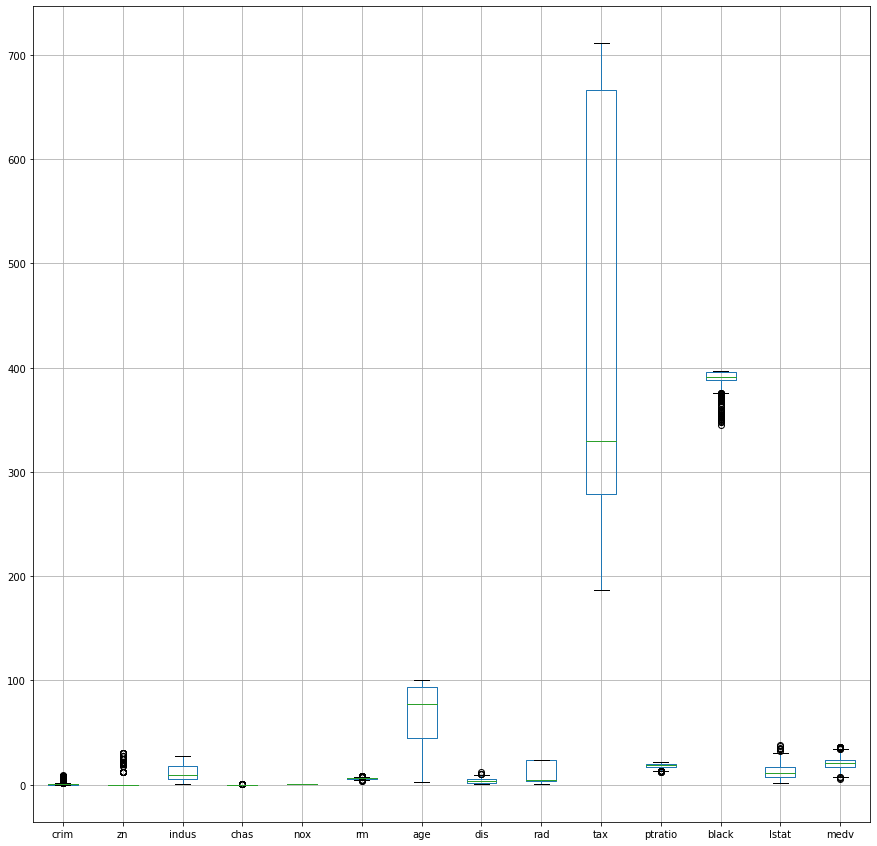

In [ ]:
bnew.boxplot(figsize=(15,15))

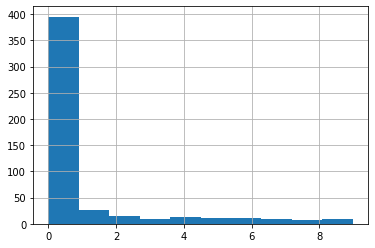

In [ ]:
bnew['crim'].hist()

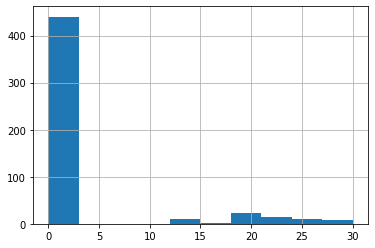

In [ ]:
bnew['zn'].hist()

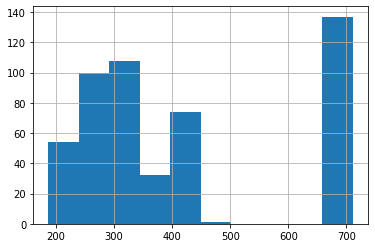

In [ ]:
bnew['tax'].hist()

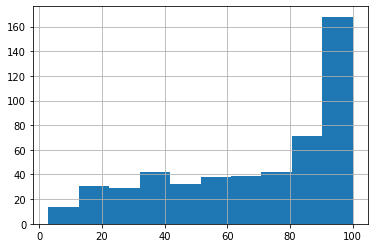

In [ ]:
bnew['age'].hist()

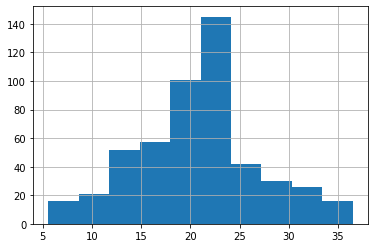

In [ ]:
bnew['medv'].hist()

#As the dataset is small in size, most variables are not showing normal distribution

In [ ]:
bnew.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.162500,0.455874,0.105399,0.489047,-0.099950,0.333203,-0.345032,0.577195,0.559003,0.221374,-0.122911,0.200224,-0.249821
zn,-0.162500,1.000000,-0.294582,-0.038927,-0.244109,0.157421,-0.200901,0.316662,-0.182530,-0.284796,-0.250318,0.030703,-0.195402,0.189467
indus,0.455874,-0.294582,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.113725,0.603800,-0.584221
chas,0.105399,-0.038927,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.067724,-0.053929,0.089774
nox,0.489047,-0.244109,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.101563,0.590879,-0.554382
rm,-0.099950,0.157421,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.024791,-0.613808,0.458424
age,0.333203,-0.200901,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.054644,0.602339,-0.532753
dis,-0.345032,0.316662,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.040691,-0.496996,0.424506
rad,0.577195,-0.182530,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.071420,0.488676,-0.489563
tax,0.559003,-0.284796,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.083632,0.543993,-0.568349


#Lets split the dataset, standardize and build a model with all the variables first

In [ ]:
X = bnew.iloc[:,:-1]
Y = bnew['medv']

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection._split import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y,)
from sklearn.linear_model import LinearRegression
model1 = LinearRegression().fit(x_train,y_train)


In [ ]:
ypred_train = model1.predict(x_train)
ypred_test = model1.predict(x_test)
from sklearn.metrics import mean_squared_error
training_error = mean_squared_error(y_train,ypred_train)
test_error = mean_squared_error(y_test,ypred_test)
print('training error:', training_error)
print('testing error:', test_error)

training error: 14.452650937079886
testing error: 16.073677499945436


In [65]:
import statsmodels.api as sma
x1 = sma.add_constant(X)
model1 = sma.OLS(Y,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     60.28
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           5.97e-93
Time:                        08:15:50   Log-Likelihood:                -1399.0
No. Observations:                 506   AIC:                             2826.
Df Residuals:                     492   BIC:                             2885.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5327      7.633      6.489      0.000      34.535      64.530
crim           0.0836      0.113      0.737      0.462      -0.139       0.307
zn            -0.0191      0.026     -0.725      0.469      -0.071       0.033
indus         -0.0592      0.051     -1.167      0.244      -0.159       0.040
chas           1.0982      0.710      1.547      0.123      -0.297       2.493
nox          -10.5854      3.171     -3.339      0.001     -16.815      -4.356
rm            -0.1658      0.338     -0.491      0.624      -0.830       0.498
age           -0.0197      0.011     -1.822      0.069      -0.041       0.002
dis           -0.4487      0.155     -2.903      0.004      -0.752      -0.145
rad            0.1175      0.055      2.140      0.033       0.010       0.225
tax           -0.0091      0.003     -2.942      0.003      -0.015      -0.003
ptratio       -0.5629      0.104     -5.404      0.000      -0.768      -0.358
black       3.358e-05      0.017      0.002      0.998      -0.034       0.034
lstat         -0.4181      0.042    -10.040      0.000      -0.500      -0.336
==============================================================================
Omnibus:                       21.499   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.093
Skew:                           0.496   Prob(JB):                     9.67e-06
Kurtosis:                       3.332   Cond. No.                     2.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#We see that Adjusted R-squared(60.28) value is less than 70. Hence the model is not acceptable.